In [1]:
import warnings 
warnings.filterwarnings ("ignore")
import numpy as np
import re, random
from pathlib import Path
import json
import pandas as pd
from pandas import DataFrame
import os, sys
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
%matplotlib inline 

In [2]:
test_data = 'adata.h5ad'
bdata = sc.read(test_data)
print(bdata)
print(bdata.obs.shape)
print(bdata.obs.head())
print(bdata.var_names)
print(bdata.obs_names)
print(type(bdata.X))

AnnData object with n_obs × n_vars = 30 × 20
    obs: 'obs_cat', 'cat_ordered', 'int64', 'float64', 'uint8'
    var: 'var_cat', 'cat_ordered', 'int64', 'float64', 'uint8'
    uns: 'O_recarray', 'nested'
    obsm: 'array', 'df', 'sparse'
    varm: 'array', 'df', 'sparse'
    layers: 'array', 'sparse'
    obsp: 'array', 'sparse'
    varp: 'array', 'sparse'
(30, 5)
      obs_cat cat_ordered  int64   float64  uint8
cell0       h           M    -16  0.715070     73
cell1       A           a    -15  0.670027     59
cell2       Z           o      0  0.312413    209
cell3       B           e    -43  0.413632    142
cell4       w           c     -9  0.673871    185
Index(['gene0', 'gene1', 'gene2', 'gene3', 'gene4', 'gene5', 'gene6', 'gene7',
       'gene8', 'gene9', 'gene10', 'gene11', 'gene12', 'gene13', 'gene14',
       'gene15', 'gene16', 'gene17', 'gene18', 'gene19'],
      dtype='object')
Index(['cell0', 'cell1', 'cell2', 'cell3', 'cell4', 'cell5', 'cell6', 'cell7',
       'cell8', 'cell9

In [3]:
root_data_dir = Path('D:\codes\TOSICA\data')
data_type = 'hPancreas'
data_dir = root_data_dir / data_type
data_file = data_dir / 'demo_train.h5ad'
ref_adata = sc.read(data_dir / 'demo_train.h5ad')
print(ref_adata.obs_names[:10])
print(ref_adata.var_names[:10])
ref_adata

Index(['human1_lib1.final_cell_0001', 'human1_lib1.final_cell_0003',
       'human1_lib1.final_cell_0004', 'human1_lib1.final_cell_0005',
       'human1_lib1.final_cell_0006', 'human1_lib1.final_cell_0008',
       'human1_lib1.final_cell_0009', 'human1_lib1.final_cell_0010',
       'human1_lib1.final_cell_0011', 'human1_lib1.final_cell_0012'],
      dtype='object')
Index(['COL1A1', 'COL1A2', 'PPY', 'CTRB1', 'CELA3A', 'CTRB2', 'SPINK1',
       'COL3A1', 'CPB1', 'COL6A3'],
      dtype='object')


AnnData object with n_obs × n_vars = 10600 × 3000
    obs: 'Celltype'
    var: 'Gene Symbol'

In [4]:
sub_data = ref_adata[ref_adata.obs_names[:5], ref_adata.var_names[:5]]
print(sub_data.X)

[[0.         0.         1.024161   5.755773   5.5564322 ]
 [0.         0.         0.7810583  6.026204   5.6276393 ]
 [0.4174824  0.         0.7111194  5.3161116  5.520279  ]
 [0.         0.         0.         5.4803586  5.0039835 ]
 [0.         0.         0.81981647 5.2516317  4.7530947 ]]


In [5]:
ref_adata.raw = ref_adata
sc.pp.normalize_total(ref_adata, target_sum=1e4)
sc.pp.log1p(ref_adata)
sc.pp.scale(ref_adata, max_value=10)
sc.tl.pca(ref_adata, svd_solver='arpack')
sc.pp.neighbors(ref_adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(ref_adata)

In [13]:
print(ref_adata[ref_adata.obs_names[:5], ref_adata.var_names[:5]].X)
print(ref_adata.raw.to_adata()[ref_adata.obs_names[:5], ref_adata.var_names[:5]].X)

[[-0.47823334 -0.34011525  1.0788786   1.9470086   1.9351877 ]
 [-0.47823334 -0.34011525  1.0725805   2.110421    2.0812624 ]
 [ 1.2486672  -0.34011525  0.8671537   1.8878866   1.9149804 ]
 [-0.47823334 -0.34011525 -0.66724217  1.948185    1.9065055 ]
 [-0.47823334 -0.34011525  1.0061827   1.944813    1.8984047 ]]
[[-0.47823334 -0.34011525  1.0788786   1.9470086   1.9351877 ]
 [-0.47823334 -0.34011525  1.0725805   2.110421    2.0812624 ]
 [ 1.2486672  -0.34011525  0.8671537   1.8878866   1.9149804 ]
 [-0.47823334 -0.34011525 -0.66724217  1.948185    1.9065055 ]
 [-0.47823334 -0.34011525  1.0061827   1.944813    1.8984047 ]]


AnnData object with n_obs × n_vars = 700 × 765
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'
Index(['HES4', 'TNFRSF4', 'SSU72', 'PARK7', 'RBP7', 'SRM', 'MAD2L2', 'AGTRAP',
       'TNFRSF1B', 'EFHD2',
       ...
       'ATP5O', 'MRPS6', 'TTC3', 'U2AF1', 'CSTB', 'SUMO3', 'ITGB2', 'S100B',
       'PRMT2', 'MT-ND3'],
      dtype='object', name='index', length=765)


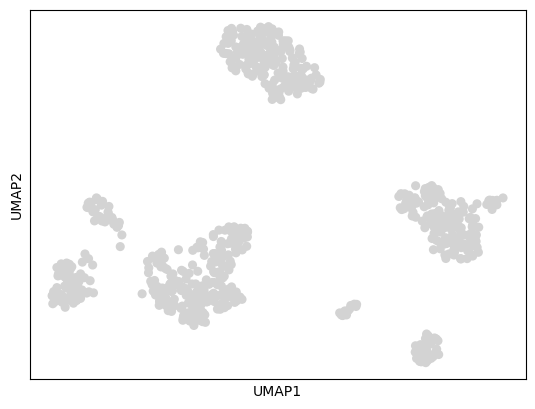

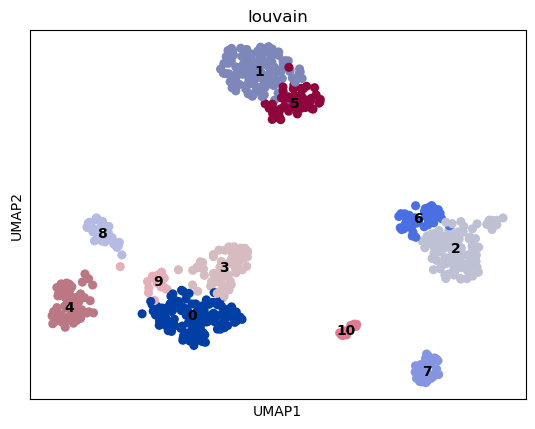

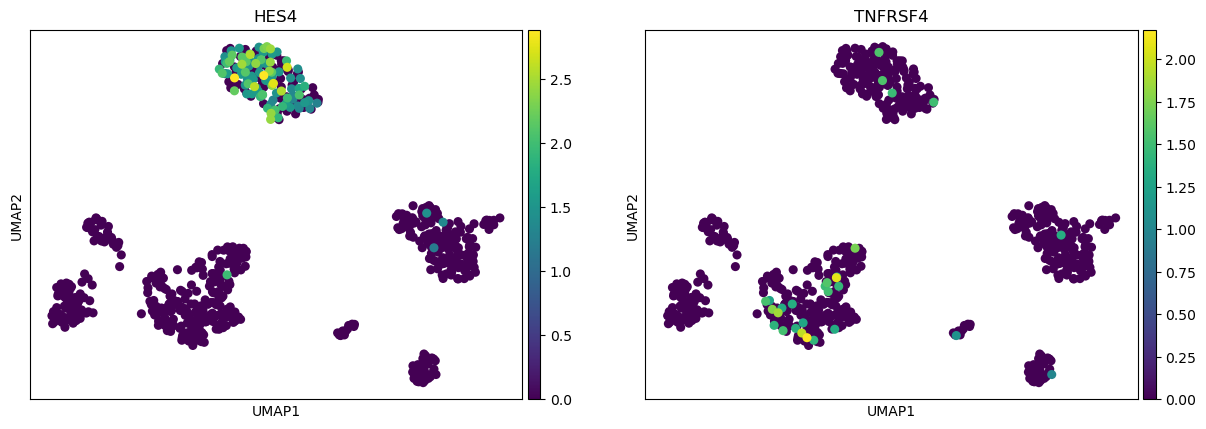

In [12]:
adata = sc.datasets.pbmc68k_reduced()
print(adata)
print(adata.var_names)
sc.pl.umap(adata)
sc.pl.umap(adata, color='louvain', legend_loc='on data')
sc.pl.umap(adata, color=["HES4", "TNFRSF4"])
